In [ ]:
#Import Library yang dibutuhkan
import yfinance as yf
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
# Mute general warnings
import warnings
warnings.filterwarnings('ignore')

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor,plot_importance

from statsmodels.tsa.arima.model import ARIMA

### Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dropout,Dense

In [ ]:
data = yf.download("BBCA.JK", start="2019-01-01", end="2023-01-01")

### Displaying first 5 rows
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,5200.0,5200.0,5200.0,5200.0,4759.143555,0
2019-01-02,5200.0,5245.0,5200.0,5240.0,4795.751953,35956000
2019-01-03,5200.0,5220.0,5115.0,5180.0,4740.838379,72358000
2019-01-04,5175.0,5205.0,5125.0,5205.0,4763.718750,51465000
2019-01-07,5265.0,5325.0,5245.0,5245.0,4800.327637,73438000


In [ ]:
#Memeriksa Kolom
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=data.index,
                      open=data.Open,
                      high=data.High,
                      low=data.Low,
                      close=data.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
data.shape

(993, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 993 entries, 2019-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       993 non-null    float64
 1   High       993 non-null    float64
 2   Low        993 non-null    float64
 3   Close      993 non-null    float64
 4   Adj Close  993 non-null    float64
 5   Volume     993 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.3 KB


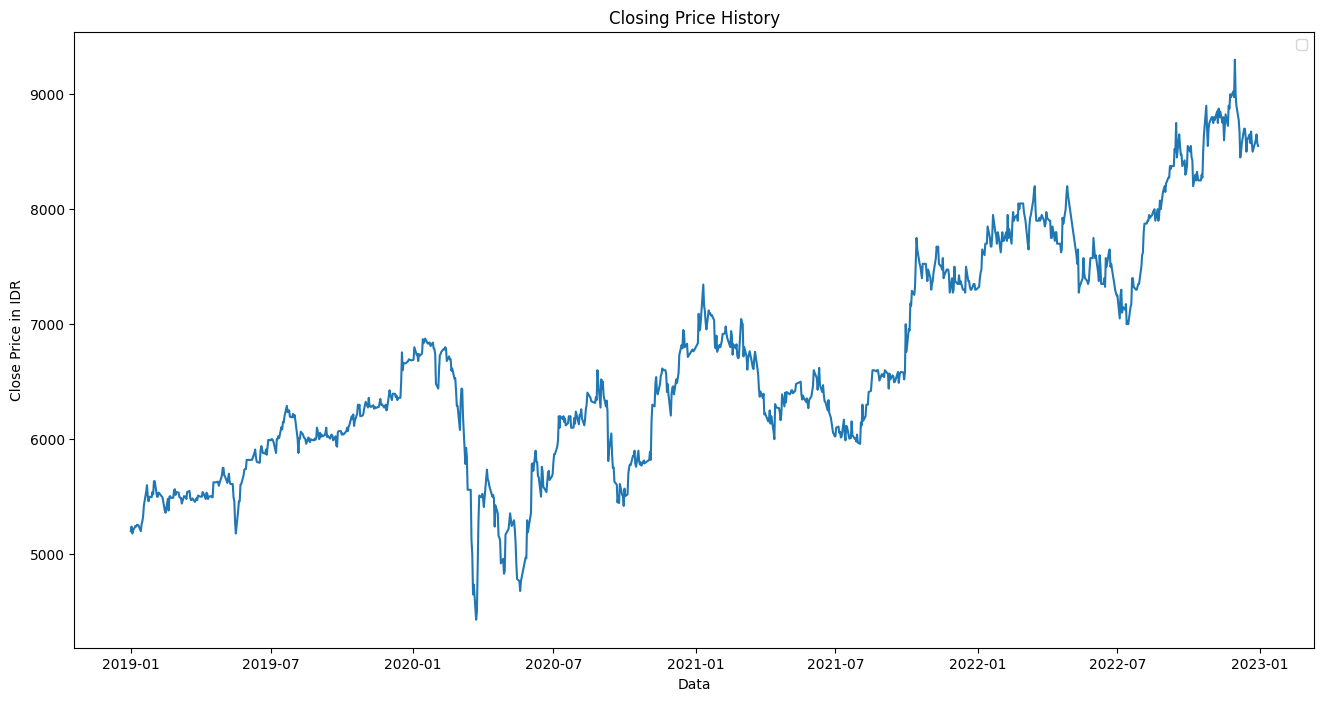

In [ ]:
## History Harga Penutupan
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data['Close'])
plt.xlabel("Data")
plt.ylabel("Close Price in IDR")
plt.legend()
plt.show()

Harga Saham BBCA meningkat secara signifikan dari tahun ke tahun, tetapi sempat menurung pada tahun 2020.

In [ ]:
### Considering the Closing Price only
df=data["Close"].values

### Converting the array into a 2-D one
df=np.reshape(df,(-1,1))

In [ ]:
### Scaling the data
### Menggunakan Standard Scaler yaitu MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df)
df_scaled[:10]

array([[0.15811088],
       [0.16632444],
       [0.15400411],
       [0.15913758],
       [0.16735113],
       [0.16632444],
       [0.16940452],
       [0.16940452],
       [0.16837782],
       [0.15811088]])

In [ ]:
### Using 80% as the Train data::
l=math.ceil(len(df_scaled)*0.8)
trained_data=df_scaled[0:l,:]
trained_data[:10]

array([[0.15811088],
       [0.16632444],
       [0.15400411],
       [0.15913758],
       [0.16735113],
       [0.16632444],
       [0.16940452],
       [0.16940452],
       [0.16837782],
       [0.15811088]])

In [ ]:
n_steps=60  ### time step variable :
X_train=[]
y_train=[]

for i in range(n_steps,len(trained_data)):
    X_train.append(trained_data[i-n_steps:i,0])
    y_train.append(trained_data[i,0])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
### Data uji untuk mengevaluasi kinerja model:
test_data=df_scaled[l-n_steps:,:]

X_test=[]
y_test=df_scaled[l:,:]
for i in range(n_steps,len(test_data)):
    X_test.append(test_data[i-n_steps:i,0])

X_test=np.array(X_test)

In [ ]:
### Mengubah bentuk data masukan menjadi (n_baris, ukuran_jendela, 1)
### Ini adalah format standar untuk LSTMs dan GRUs:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  ### Mengubah bentuk data Uji juga untuk memenuhi persyaratan masukan

In [ ]:
### Kami akan mengevaluasi model menggunakan fungsi kerugian kustom yang akan menghitung MAPE:
def mape(y_true, y_pred):
    # menghitung kerugian, menggunakan y_pred
    loss = np.mean(np.abs((y_pred / y_true) - 1))
    return kerugian


In [ ]:
## Arsitektur RNN menggunakan stacked LSTMs:
model1 = Sequential([
    LSTM(1000, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(500, return_sequences=True),
    LSTM(100, return_sequences=False),
    Dense(25),
    Dense(1)
])

model1.compile(optimizer="adam", loss="mean_squared_error")

## Arsitektur RNN menggunakan stacked GRUs:
model2 = Sequential([
    GRU(1000, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(500, return_sequences=True),
    GRU(100, return_sequences=False),
    Dense(25),
    Dense(1)
])

model2.compile(optimizer="adam", loss="mean_squared_error")

Epoch 1/10
23/23 [==============================] - 49s 2s/step - loss: 0.0284
Epoch 2/10
23/23 [==============================] - 42s 2s/step - loss: 0.0031
Epoch 3/10
23/23 [==============================] - 40s 2s/step - loss: 0.0023
Epoch 4/10
23/23 [==============================] - 41s 2s/step - loss: 0.0018
Epoch 5/10
23/23 [==============================] - 40s 2s/step - loss: 0.0023
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 0.0018
Epoch 7/10
23/23 [==============================] - 40s 2s/step - loss: 0.0015
Epoch 8/10
23/23 [==============================] - 40s 2s/step - loss: 0.0014
Epoch 9/10
23/23 [==============================] - 41s 2s/step - loss: 0.0014
Epoch 10/10
23/23 [==============================] - 40s 2s/step - loss: 0.0013


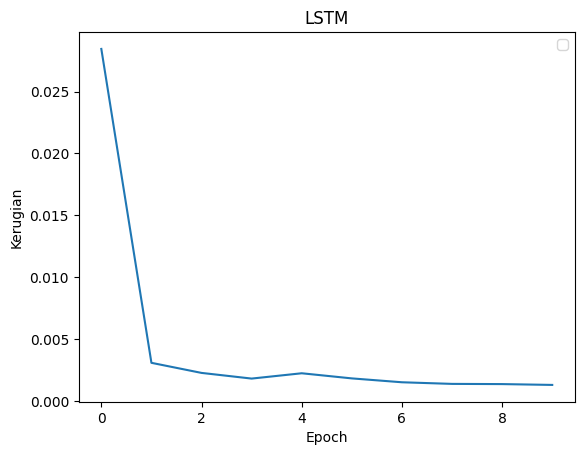

------------------------------------
Epoch 1/10
23/23 [==============================] - 35s 1s/step - loss: 0.0209
Epoch 2/10
23/23 [==============================] - 31s 1s/step - loss: 0.0013
Epoch 3/10
23/23 [==============================] - 31s 1s/step - loss: 7.7589e-04
Epoch 4/10
23/23 [==============================] - 31s 1s/step - loss: 7.1143e-04
Epoch 5/10
23/23 [==============================] - 31s 1s/step - loss: 7.0008e-04
Epoch 6/10
23/23 [==============================] - 30s 1s/step - loss: 6.3797e-04
Epoch 7/10
23/23 [==============================] - 31s 1s/step - loss: 6.0468e-04
Epoch 8/10
23/23 [==============================] - 31s 1s/step - loss: 5.7951e-04
Epoch 9/10
23/23 [==============================] - 31s 1s/step - loss: 5.5767e-04
Epoch 10/10
23/23 [==============================] - 31s 1s/step - loss: 5.3846e-04


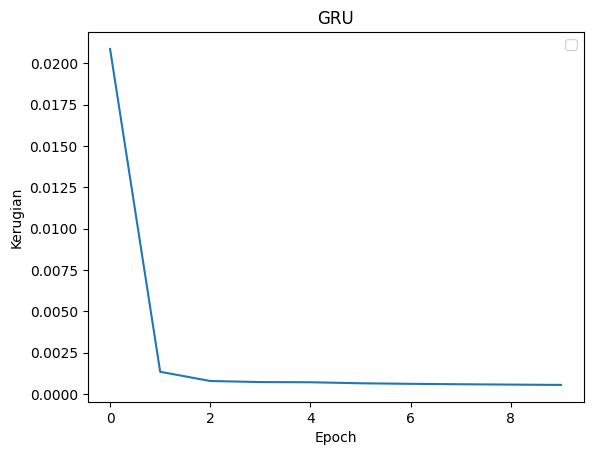

------------------------------------


In [ ]:
models = {"LSTM": model1, "GRU": model2}

for i, j in models.items():
    # Melatih model
    j.fit(X_train, y_train, epochs=10)

    # Visualisasi kurva loss vs epoch
    plt.title(i)
    plt.plot(j.history.history["loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Kerugian")
    plt.legend()
    plt.show()
    print("------------------------------------")

In [ ]:
X_train.shape,X_test.shape

((735, 60, 1), (198, 60, 1))

7/7 [==============================] - 4s 388ms/step


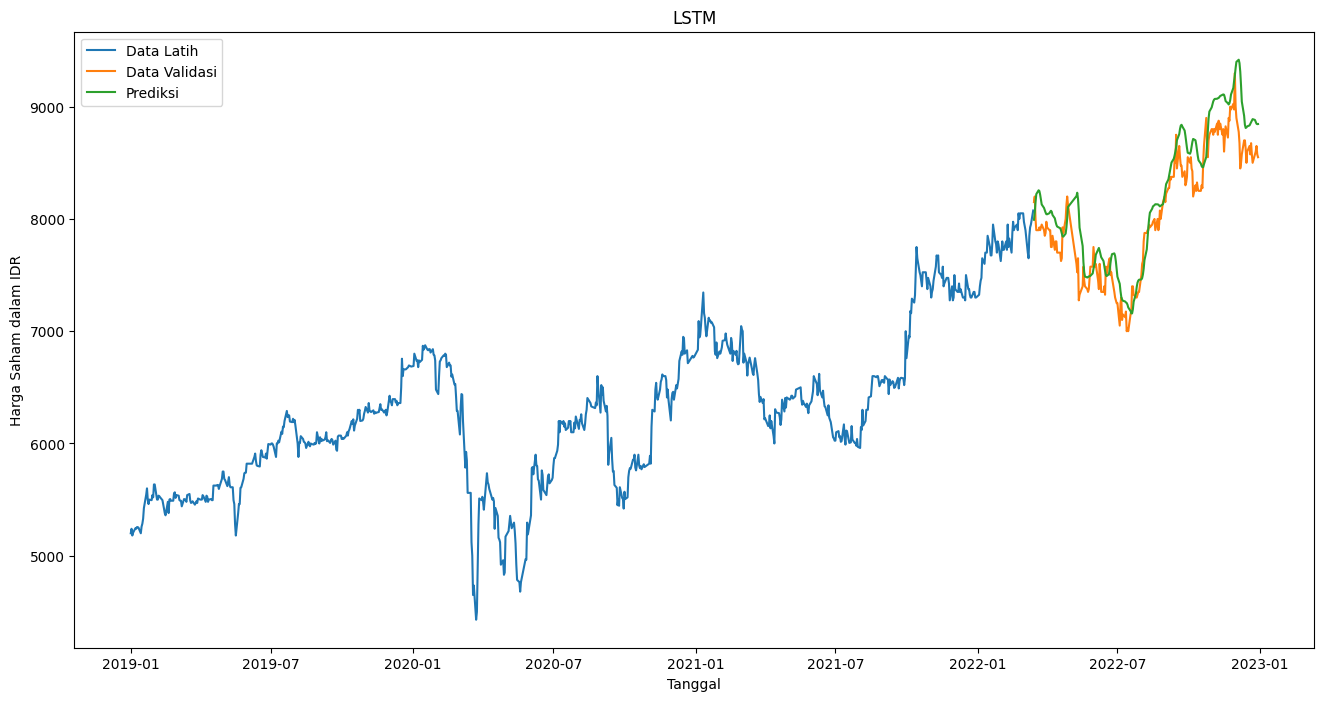



Kerugian MSE yang dihasilkan oleh model LSTM adalah: 68137883.43486278


Kerugian RMSE yang dihasilkan oleh model LSTM adalah: 8254.567428694418




NameError: ignored

In [ ]:
pred_ = {}

# Memilih data pelatihan
train = data[0:l]
# Memilih data validasi
valid = data[l:]

for i, j in models.items():
    # Memprediksi dengan model
    pred = j.predict(X_test)
    # Mengembalikan prediksi ke skala asli
    pred = sc.inverse_transform(pred)

    # Menambahkan kolom "Predictions" pada data validasi
    valid["Prediksi"] = pred

    plt.figure(figsize=(16, 8))
    plt.title(f"{i}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga Saham dalam IDR")
    plt.plot(train["Close"])
    plt.plot(valid[["Close", "Prediksi"]])
    plt.legend(["Data Latih", "Data Validasi", "Prediksi"])
    plt.show()

    print("\n")
    print(f"Kerugian MSE yang dihasilkan oleh model {i} adalah:", np.mean(((pred - y_test) ** 2)))
    print("\n")
    print(f"Kerugian RMSE yang dihasilkan oleh model {i} adalah:", np.sqrt(np.mean(((pred - y_test) ** 2))))
    print("\n")
    print(f"Kerugian MAPE yang dihasilkan oleh model {i} adalah:", mape(y_test, pred))
    print("\n")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prediksi dari model LSTM
pred_lstm = model1.predict(X_test)
# Prediksi dari model GRU
pred_gru = model2.predict(X_test)

# Mengembalikan prediksi ke skala asli
pred_lstm = sc.inverse_transform(pred_lstm)
pred_gru = sc.inverse_transform(pred_gru)

# Menghitung MSE, RMSE, dan MAPE untuk model LSTM
mse_lstm = mean_squared_error(y_test, pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = mape(y_test, pred_lstm)

# Menghitung MSE, RMSE, dan MAPE untuk model GRU
mse_gru = mean_squared_error(y_test, pred_gru)
rmse_gru = np.sqrt(mse_gru)
mape_gru = mape(y_test, pred_gru)

# Menampilkan hasil
print("Model LSTM:")
print("MSE: ", mse_lstm)
print("RMSE: ", rmse_lstm)
print("MAPE: ", mape_lstm)
print("\n")

print("Model GRU:")
print("MSE: ", mse_gru)
print("RMSE: ", rmse_gru)
print("MAPE: ", mape_gru)